In [23]:
import sys

sys.path.append('lib')
from calculation_manager import CalculationManager
from cross_section import CrossSection

xs_fuel = CrossSection()
xs_fuel.set([[1.58, 0.0032, 0.0, 1.0],[0.271, 0.0930, 0.168, 0.0]])
xs_fuel.set_smat( [[0.0, 0.0178], [0.0, 0.0]])
xs_fuel.calc_sigr()

xs_ref = CrossSection()
xs_ref.set([[1.41, 0.0, 0.0, 1.0],[0.117, 0.0191, 0.0, 0.0]])
xs_ref.set_smat( [[0.0, 0.0476], [0.0, 0.0]])
xs_ref.calc_sigr()

geom = [{'xs':xs_ref, 'width':30}, {'xs':xs_fuel, 'width':60}, {'xs':xs_ref, 'width':30} ]

delta = 1.0
albedo = -1.0

config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'max_iteration': 1000, \
            'omega': 0.5, 'asymptotic_criteria': 0.05}

calc_man = CalculationManager(config)
count, flag = calc_man.run()
print( "outer iterations:", count)

keff = calc_man.get_keff()


print ("count = ", count, ", keff = ", keff)

outer iterations: 65
count =  65 , keff =  1.3582632555729413


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
keffs = []
omegas = [-0.5, -0.25, -0.1, 0.0, 0.1, 0.25, 0.5, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for omega in omegas:
    config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'omega': omega, 'asymptotic_criteria':0.03}
    calc_man = CalculationManager(config)
    count, falg = calc_man.run()
    keff = calc_man.get_keff()
    print ("omega = ", omega, ", count = ", count, ", keff = ", keff)
    keffs.append(keff)   

    

omega =  -0.5 , count =  66 , keff =  1.3582632589827903
omega =  -0.25 , count =  65 , keff =  1.3582631858519494
omega =  -0.1 , count =  65 , keff =  1.3582631957585314
omega =  0.0 , count =  65 , keff =  1.3582632024434553
omega =  0.1 , count =  65 , keff =  1.358263209175308
omega =  0.25 , count =  65 , keff =  1.3582632193160324
omega =  0.5 , count =  65 , keff =  1.3582632555729413
omega =  1.0 , count =  55 , keff =  1.358265325156532
omega =  1.1 , count =  75 , keff =  1.3582632015180973
omega =  1.2 , count =  64 , keff =  1.358263238251541
omega =  1.3 , count =  130 , keff =  1.3582631897724098
omega =  1.4 , count =  72 , keff =  1.3582642667620666
omega =  1.5 , count =  73 , keff =  1.358264264115259
omega =  2.0 , count =  61 , keff =  1.3582642479623164


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
keffs = []
omega = 1.0
criteria = list(range(1, 50))
for c in criteria:
    the_criteria = c / 1000
    config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'omega': omega, 'asymptotic_criteria':the_criteria}
    calc_man = CalculationManager(config)
    count, falg = calc_man.run()
    keff = calc_man.get_keff()
    print ("omega = ", omega, ", cri = ", the_criteria, " count = ", count, ", keff = ", keff)
    keffs.append(keff)   


omega =  1.0 , cri =  0.001  count =  73 , keff =  1.3582631897190518
omega =  1.0 , cri =  0.002  count =  73 , keff =  1.3582631897190518
omega =  1.0 , cri =  0.003  count =  73 , keff =  1.3582631897190518
omega =  1.0 , cri =  0.004  count =  73 , keff =  1.3582632118928064
omega =  1.0 , cri =  0.005  count =  73 , keff =  1.3582632118928064
omega =  1.0 , cri =  0.006  count =  77 , keff =  1.3582632346370989
omega =  1.0 , cri =  0.007  count =  77 , keff =  1.3582632573022126
omega =  1.0 , cri =  0.008  count =  113 , keff =  1.358263204784794
omega =  1.0 , cri =  0.009  count =  80 , keff =  1.3582642385738501
omega =  1.0 , cri =  0.01  count =  80 , keff =  1.3582642385738501
omega =  1.0 , cri =  0.011  count =  80 , keff =  1.3582642385738501
omega =  1.0 , cri =  0.012  count =  80 , keff =  1.3582642385738501
omega =  1.0 , cri =  0.013  count =  113 , keff =  1.3582632094022176
omega =  1.0 , cri =  0.014  count =  113 , keff =  1.3582632094022176
omega =  1.0 , cri 

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
keffs = []
omegas = [-0.5, -0.25, -0.1, 0.0, 0.1, 0.25, 0.5, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
criteria = list(range(5,50,5))
counts = np.zeros((len(omegas), len(criteria)))

for i in range(len(omegas)):
    omega = omegas[i]
    for j in range(len(criteria)):
        the_criteria = criteria[j] / 1000
        config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'omega': omega, 'asymptotic_criteria':the_criteria}
        calc_man = CalculationManager(config)
        count, falg = calc_man.run()
        keff = calc_man.get_keff()
        print ("omega = ", omega, ", cri = ", the_criteria, " count = ", count, ", keff = ", keff)
        counts[i][j] = count
        keffs.append(keff)   


omega =  -0.5 , cri =  0.005  count =  66 , keff =  1.3582632803437598
omega =  -0.5 , cri =  0.01  count =  66 , keff =  1.3582632803437598
omega =  -0.5 , cri =  0.015  count =  66 , keff =  1.3582632803437598
omega =  -0.5 , cri =  0.02  count =  66 , keff =  1.3582632803437598
omega =  -0.5 , cri =  0.025  count =  66 , keff =  1.3582632663272993
omega =  -0.5 , cri =  0.03  count =  66 , keff =  1.3582632589827903
omega =  -0.5 , cri =  0.035  count =  66 , keff =  1.3582632589827903
omega =  -0.5 , cri =  0.04  count =  66 , keff =  1.3582632589827903
omega =  -0.5 , cri =  0.045  count =  66 , keff =  1.3582632589827903
omega =  -0.25 , cri =  0.005  count =  65 , keff =  1.3582631858519494
omega =  -0.25 , cri =  0.01  count =  65 , keff =  1.3582631858519494
omega =  -0.25 , cri =  0.015  count =  65 , keff =  1.3582631858519494
omega =  -0.25 , cri =  0.02  count =  65 , keff =  1.3582631858519494
omega =  -0.25 , cri =  0.025  count =  65 , keff =  1.3582631858519494
omega =

omega =  2.0 , cri =  0.01  count =  357 , keff =  1.358264273168905
omega =  2.0 , cri =  0.015  count =  62 , keff =  1.3582642022808575
omega =  2.0 , cri =  0.02  count =  62 , keff =  1.3582642022808575
omega =  2.0 , cri =  0.025  count =  62 , keff =  1.3582642022808575
omega =  2.0 , cri =  0.03  count =  61 , keff =  1.3582642479623164
omega =  2.0 , cri =  0.035  count =  61 , keff =  1.3582642479623164
omega =  2.0 , cri =  0.04  count =  61 , keff =  1.3582642479623164
omega =  2.0 , cri =  0.045  count =  61 , keff =  1.3582642479623164


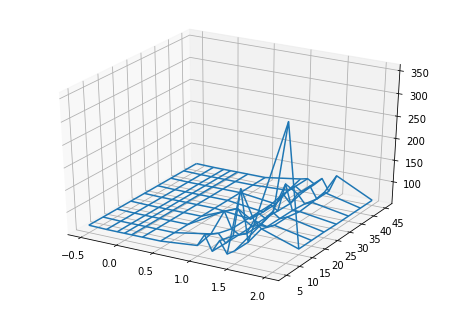

In [109]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


X, Y = np.meshgrid(criteria, omegas)
Z = np.array(counts)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(Y,X,Z) 

plt.show()
